# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

  Using cached citipy-0.0.6-py3-none-any.whl
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [6]:
cities

['el granada',
 'invercargill',
 'arraial do cabo',
 'waitangi',
 'ribeira grande',
 'east london',
 'puerto natales',
 'saint-denis',
 'papatowai',
 'naze',
 'tutoia',
 'mogocha',
 'cruz del eje',
 'dudinka',
 'san patricio',
 'vorgashor',
 'lebu',
 'killingly center',
 'oranjemund',
 "st. john's",
 'grytviken',
 'thompson',
 'hamina',
 'bethel',
 'minas de marcona',
 'wailua homesteads',
 'port-aux-francais',
 'bardai',
 'adamstown',
 'avarua',
 'chonchi',
 'bilibino',
 'san pedro',
 'edinburgh of the seven seas',
 'igarka',
 'qaqortoq',
 'keflavik',
 'tindouf',
 'sitka',
 'weno',
 'utrik',
 'shingu',
 'kerikeri',
 'carnarvon',
 'iqaluit',
 'tiksi',
 'georgetown',
 'saipan',
 'ilulissat',
 'ghatanji',
 'inarajan village',
 'rosarito',
 'jamestown',
 'bartica',
 'talnakh',
 'calvi',
 'albany',
 'soran',
 'roma',
 'port blair',
 'coquimbo',
 'puerto ayora',
 'carnot',
 'taperoa',
 'anadyr',
 'bereket',
 'new plymouth',
 'kapuskasing',
 'akureyri',
 'three points',
 'meulaboh',
 'olonki

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
weather_api_key

'1e9a3f1fe055a797acaf3b14b71a2236'

In [8]:
# Set the API base URL
#url = https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={api_keys}
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | el granada
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | saint-denis
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | naze
Processing Record 11 of Set 1 | tutoia
Processing Record 12 of Set 1 | mogocha
Processing Record 13 of Set 1 | cruz del eje
Processing Record 14 of Set 1 | dudinka
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | killingly center
Processing Record 19 of Set 1 | oranjemund
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | thompson
Proce

Processing Record 40 of Set 4 | kashgar
Processing Record 41 of Set 4 | tshikapa
Processing Record 42 of Set 4 | lisala
Processing Record 43 of Set 4 | san juan de miraflores
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | nova sintra
Processing Record 46 of Set 4 | lubang
Processing Record 47 of Set 4 | punta arenas
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | aykhal
Processing Record 0 of Set 5 | port lincoln
Processing Record 1 of Set 5 | xai-xai
Processing Record 2 of Set 5 | jayapura
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | viedma
Processing Record 5 of Set 5 | ar rass
Processing Record 6 of Set 5 | quellon
Processing Record 7 of Set 5 | rouissat
Processing Record 8 of Set 5 | scottburgh
Processing Record 9 of Set 5 | severnoye
Processing Record 10 of Set 5 | murray
Processing Record 11 of Set 5 | roquemaure
Processing Record 12 of Set 5 | colonia del sacramento
Processing Record 13 of Se

Processing Record 32 of Set 8 | tongouson
Processing Record 33 of Set 8 | ado-ekiti
Processing Record 34 of Set 8 | qal'at bishah
City not found. Skipping...
Processing Record 35 of Set 8 | maisi
Processing Record 36 of Set 8 | balotra
Processing Record 37 of Set 8 | arno
Processing Record 38 of Set 8 | mar del plata
Processing Record 39 of Set 8 | kharp
Processing Record 40 of Set 8 | pushchino
Processing Record 41 of Set 8 | vel'sk
Processing Record 42 of Set 8 | vanimo
Processing Record 43 of Set 8 | batang
Processing Record 44 of Set 8 | zhezqazghan
Processing Record 45 of Set 8 | fenoarivo atsinanana
Processing Record 46 of Set 8 | odda
Processing Record 47 of Set 8 | eirunepe
Processing Record 48 of Set 8 | margate
Processing Record 49 of Set 8 | revda
Processing Record 0 of Set 9 | umm kaddadah
Processing Record 1 of Set 9 | cabedelo
Processing Record 2 of Set 9 | burgersdorp
Processing Record 3 of Set 9 | huanuni
Processing Record 4 of Set 9 | alta sierra
Processing Record 5 of

Processing Record 22 of Set 12 | bathsheba
Processing Record 23 of Set 12 | el idrissia
Processing Record 24 of Set 12 | bikenibeu village
Processing Record 25 of Set 12 | touros
Processing Record 26 of Set 12 | gebeit
Processing Record 27 of Set 12 | sheksna
Processing Record 28 of Set 12 | qashyr
Processing Record 29 of Set 12 | urengoy
Processing Record 30 of Set 12 | illizi
Processing Record 31 of Set 12 | horta
Processing Record 32 of Set 12 | ballycastle
Processing Record 33 of Set 12 | ormara
Processing Record 34 of Set 12 | al hufuf
Processing Record 35 of Set 12 | jabor
Processing Record 36 of Set 12 | klaksvik
Processing Record 37 of Set 12 | olenino
Processing Record 38 of Set 12 | zhaotong
Processing Record 39 of Set 12 | cockburn town
Processing Record 40 of Set 12 | ust-tsilma
Processing Record 41 of Set 12 | ugoofaaru
Processing Record 42 of Set 12 | manadhoo
Processing Record 43 of Set 12 | grand haven
Processing Record 44 of Set 12 | dryden
Processing Record 45 of Set 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#df = pd.DataFrame(data)


# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,el granada,37.5027,-122.4694,33.05,58,0,2.06,US,1697662875
1,invercargill,-46.4000,168.3500,12.23,84,100,7.15,NZ,1697662879
2,arraial do cabo,-22.9661,-42.0278,23.98,83,75,5.66,BR,1697662880
3,waitangi,-43.9535,-176.5597,13.23,80,100,4.47,NZ,1697662880
4,ribeira grande,38.5167,-28.7000,22.22,94,75,10.80,PT,1697662880


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(25)

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el granada,37.5027,-122.4694,33.05,58,0,2.06,US,1697662875
1,invercargill,-46.4000,168.3500,12.23,84,100,7.15,NZ,1697662879
2,arraial do cabo,-22.9661,-42.0278,23.98,83,75,5.66,BR,1697662880
3,waitangi,-43.9535,-176.5597,13.23,80,100,4.47,NZ,1697662880
4,ribeira grande,38.5167,-28.7000,22.22,94,75,10.80,PT,1697662880
5,east london,-33.0153,27.9116,19.27,84,95,6.43,ZA,1697662880
6,puerto natales,-51.7236,-72.4875,15.25,47,75,7.20,CL,1697662880
7,saint-denis,48.9167,2.3333,17.45,84,75,8.75,FR,1697662880
8,papatowai,-46.5619,169.4708,12.01,64,100,4.40,NZ,1697662881


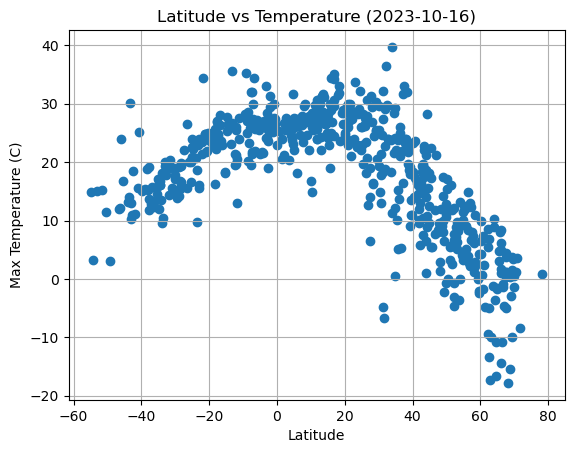

In [71]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (2023-10-16)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

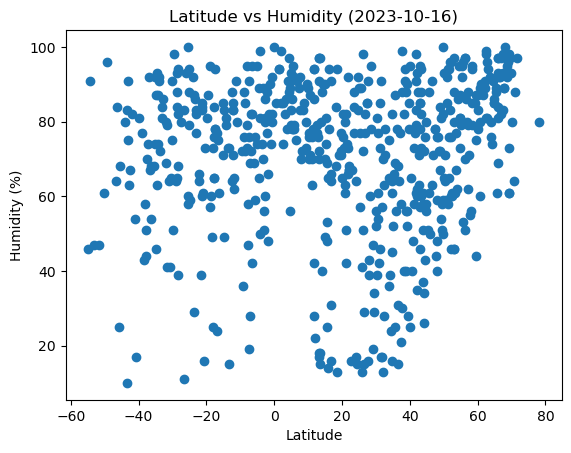

In [70]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
# Add a title and x and y labels
plt.title("Latitude vs Humidity (2023-10-16)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

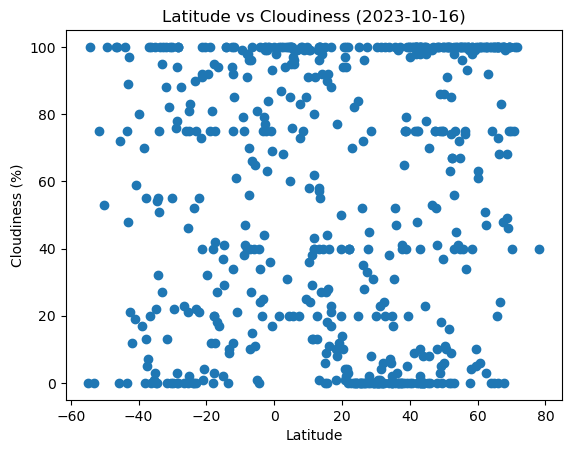

In [69]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
# Add a title and x and y labels
plt.title("Latitude vs Cloudiness (2023-10-16)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

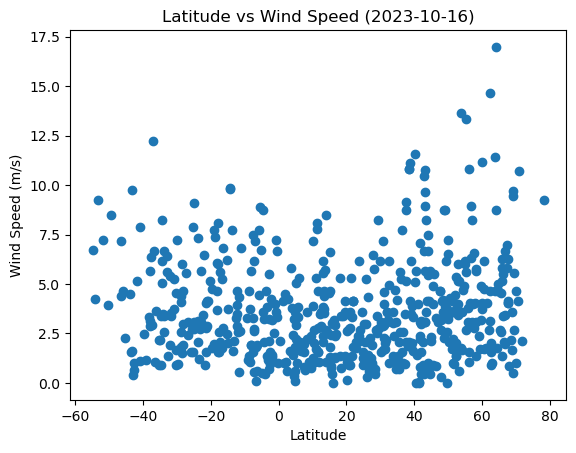

In [68]:
# Build scatter plot for latitude vs. wind
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
# Add a title and x and y labels
plt.title("Latitude vs Wind Speed (2023-10-16)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


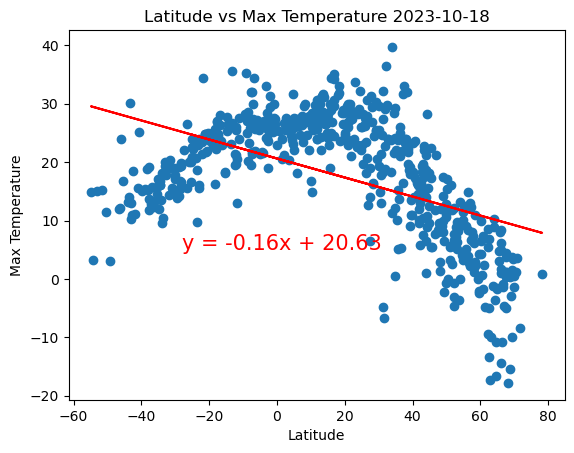

In [58]:
# Define a function to create Linear Regression plot

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "."
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-28,5),fontsize=15,color="red")
plt.title("Latitude vs Max Temperature (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el granada,37.5027,-122.4694,33.05,58,0,2.06,US,1697662875
4,ribeira grande,38.5167,-28.7000,22.22,94,75,10.80,PT,1697662880
7,saint-denis,48.9167,2.3333,17.45,84,75,8.75,FR,1697662880
9,naze,28.3667,129.4833,16.51,60,0,0.47,JP,1697662881
11,mogocha,53.7333,119.7667,-3.67,77,45,1.78,RU,1697662881


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,12.23,84,100,7.15,NZ,1697662879
2,arraial do cabo,-22.9661,-42.0278,23.98,83,75,5.66,BR,1697662880
3,waitangi,-43.9535,-176.5597,13.23,80,100,4.47,NZ,1697662880
5,east london,-33.0153,27.9116,19.27,84,95,6.43,ZA,1697662880
6,puerto natales,-51.7236,-72.4875,15.25,47,75,7.20,CL,1697662880


###  Temperature vs. Latitude Linear Regression Plot

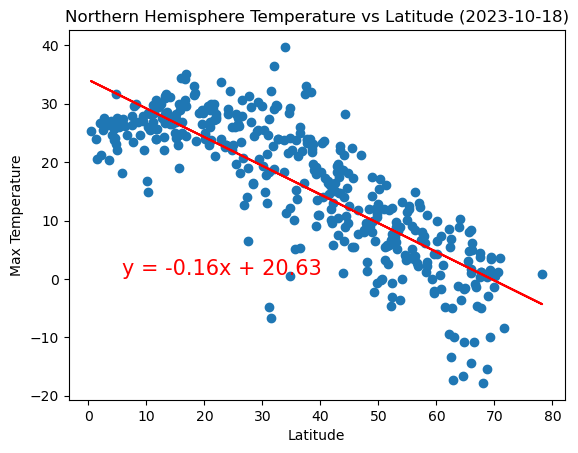

In [67]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere Temperature vs Latitude (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

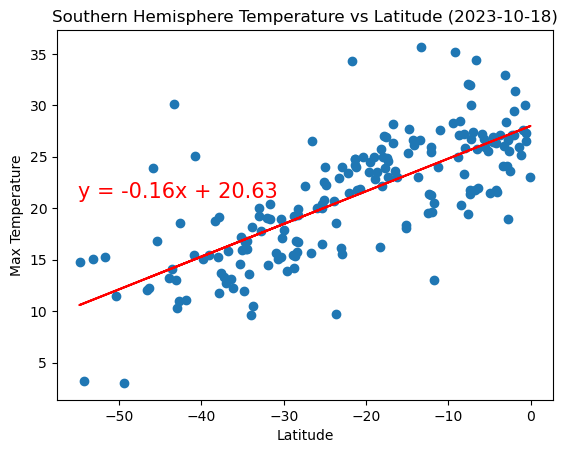

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.title("Southern Hemisphere Temperature vs Latitude (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

A relationship exists between a given city's temperature and latitude. Since we expect that to be true in bothe the northern and southern hemispheres as demonstated above, this sets our baseline for significance in this project.

### Humidity vs. Latitude Linear Regression Plot

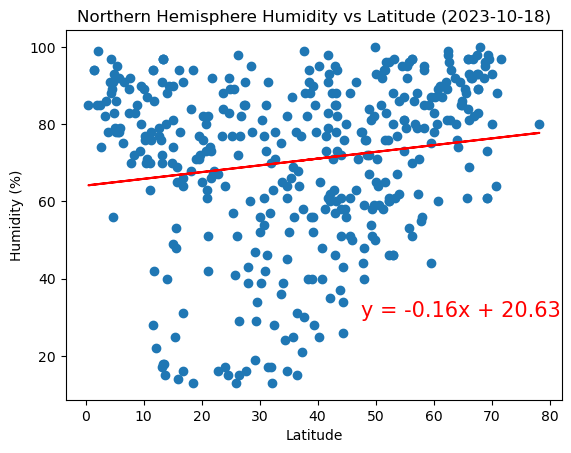

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47.5,30),fontsize=15,color="red")
plt.title("Northern Hemisphere Humidity vs Latitude (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

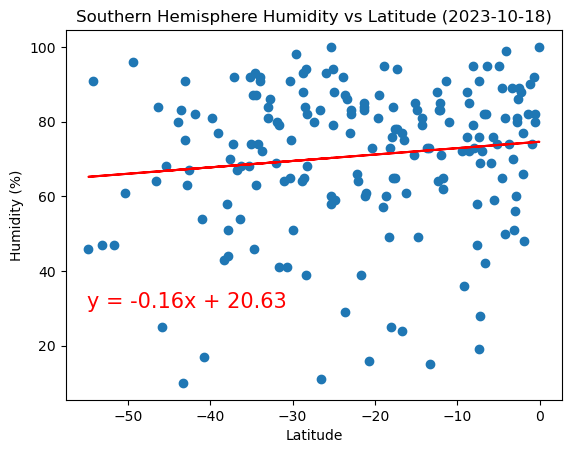

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title("Southern Hemisphere Humidity vs Latitude (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

That red line right there is pretty flat. There just isn't as strong of a relationship between latitude and humidity as there is between latitude and temperature.

### Cloudiness vs. Latitude Linear Regression Plot

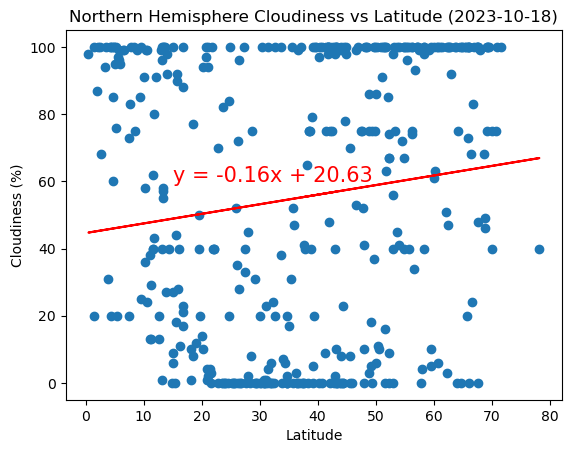

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.title("Northern Hemisphere Cloudiness vs Latitude (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

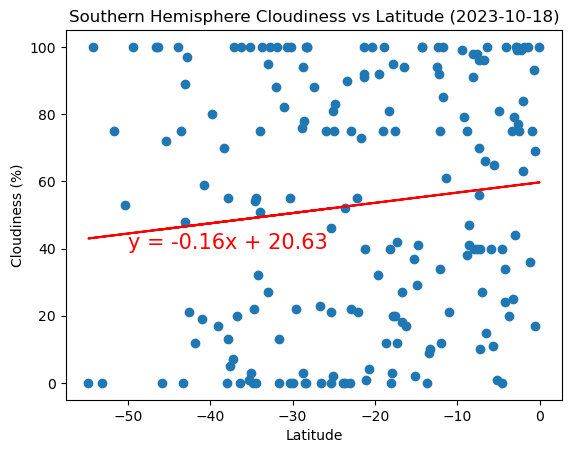

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title("Southern Hemisphere Cloudiness vs Latitude (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

There is not as strong of a relationship between latitude and cloudiness as there is between latitude and temperature.

### Wind Speed vs. Latitude Linear Regression Plot

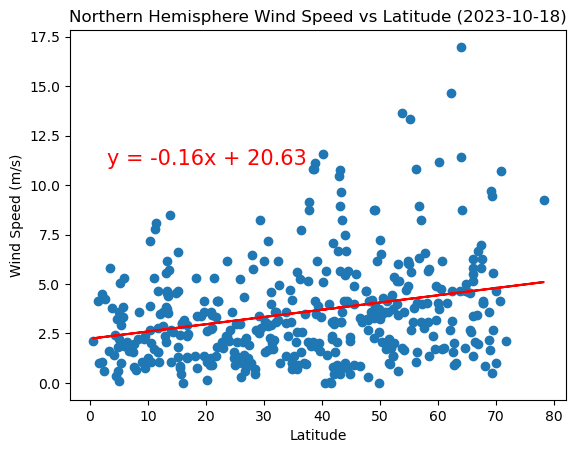

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,11),fontsize=15,color="red")
plt.title("Northern Hemisphere Wind Speed vs Latitude (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

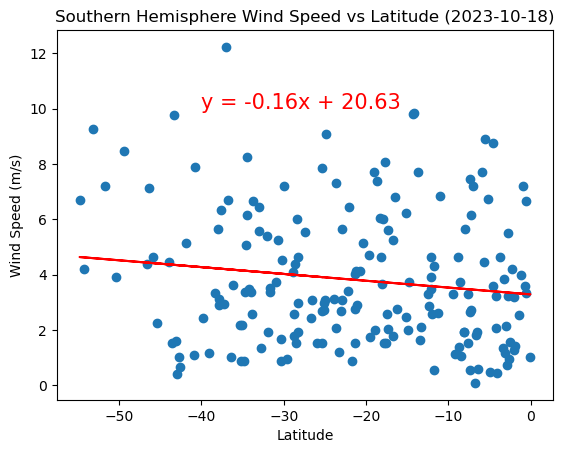

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40, 10),fontsize=15,color="red")
plt.title("Southern Hemisphere Wind Speed vs Latitude (2023-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
There is not as strong of a relationship between latitude and cloudiness as there is between latitude and temperature.